In [ ]:
#https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv")

In [4]:
df.head(3)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [6]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [7]:
df.dropna(inplace=True)

In [8]:
df.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402029e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.671337e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df['floors'].value_counts().to_frame()

,floors
1.0,10673
2.0,8235
1.5,1910
3.0,611
2.5,161
3.5,7


<Axes: xlabel='waterfront', ylabel='price'>

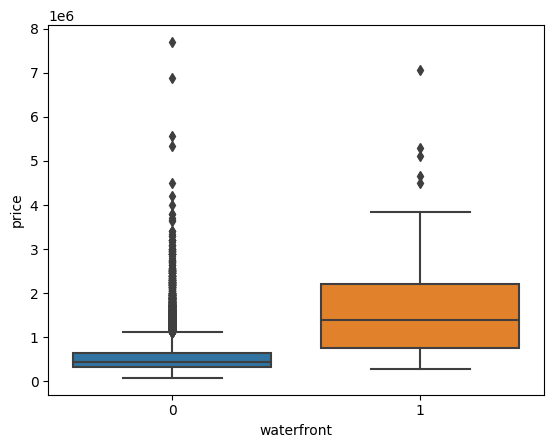

In [11]:
sns.boxplot(data=df,x="waterfront", y="price")

(0.0, 8081100.0)

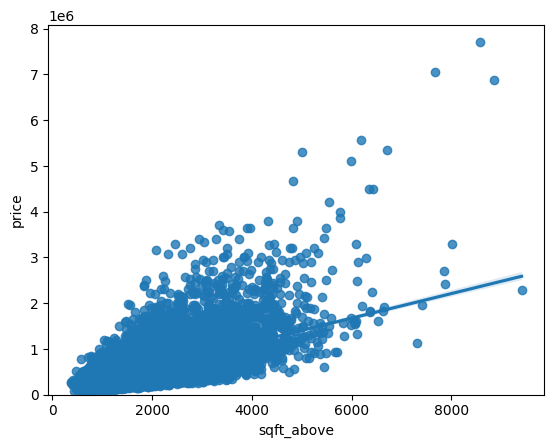

In [12]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

In [13]:
df.corr()['price'].sort_values()


<ipython-input-13-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053437
long             0.022092
condition        0.036025
yr_built         0.053984
sqft_lot15       0.082837
sqft_lot         0.089882
yr_renovated     0.126415
floors           0.256814
waterfront       0.266437
lat              0.306777
bedrooms         0.308794
sqft_basement    0.323776
view             0.397318
bathrooms        0.525905
sqft_living15    0.585247
sqft_above       0.605371
grade            0.667922
sqft_living      0.701909
price            1.000000
Name: price, dtype: float64

In [14]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.49267663172823806

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y_df = df['price']
x_df=df.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=1)

In [17]:
lre=LinearRegression()
lre.fit(x_train[['sqft_living']], y_train)
lre.score(x_test[['sqft_living']], y_test)

0.5008444935269114

In [18]:
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

In [19]:
y_df = df['price']
x_df=features

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=10)

In [21]:
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.6536649551041127

In [27]:
pipes=[("scale",StandardScaler()),("polynomial",PolynomialFeatures(degree=2)),("mode",LinearRegression())]

In [28]:
pipe=Pipeline(pipes)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [29]:
pipe.fit(features,df["price"])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [34]:
pipe.score(features,df["price"])

0.7513033923085319

In [42]:
from sklearn.linear_model import Ridge

In [45]:
pol=PolynomialFeatures(degree=2)
x_train_pol=pol.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_test_pol=pol.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

In [48]:
rmodel=Ridge(alpha=0.1)
rmodel.fit(x_train_pol, y_train)

Ridge(alpha=0.1)

In [49]:
rmodel.score(x_train_pol, y_train)


0.7369156741201204

In [52]:
pol2=PolynomialFeatures(degree=2)
pol2

PolynomialFeatures()

In [54]:
x_train_pol2=pol2.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_pol=pol2.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

In [56]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pol2, y_train)
RidgeModel.score(x_train_pol2, y_train)

0.7369156741201204

In [57]:
x_test_pol2=pol2.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_polly=pol2.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])


In [58]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_test_pol2, y_test)
RidgeModel.score(x_test_pol2, y_test)

0.7622985752322926